In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

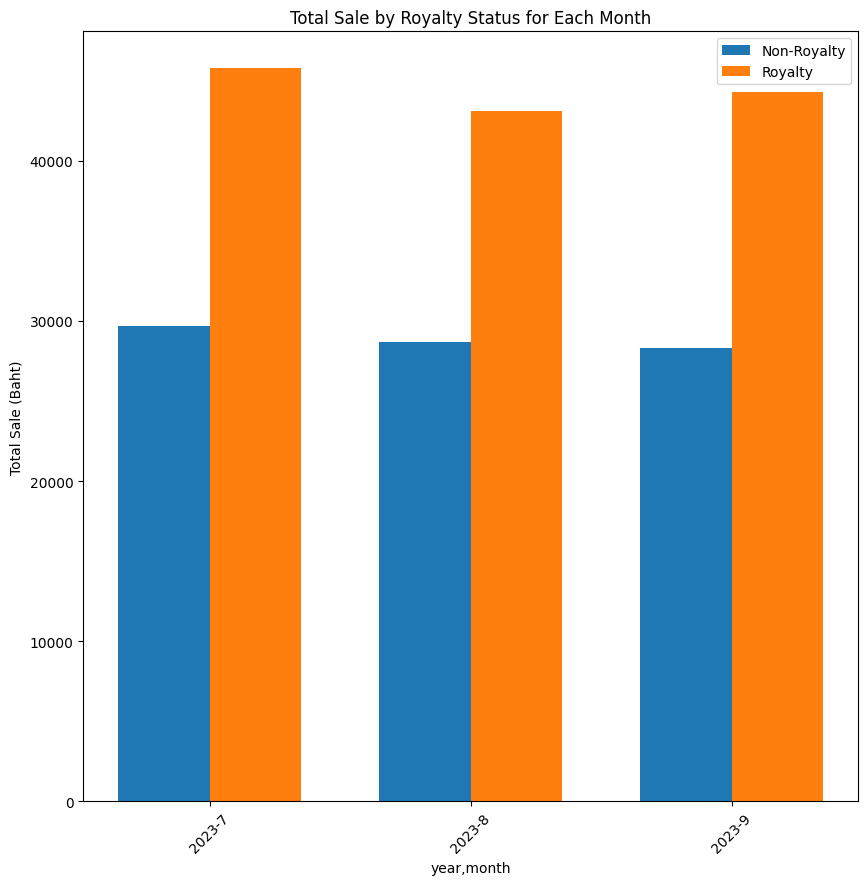

In [8]:
# Group No. 7
# 1. Benjarat Chooduang 6410450516
# 2. Kanyapat Thumthong 6410450346
# 3. Nopparuj Kunsongkhunakon 6410451687
# ---


group = 7
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"


# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"


# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# เอาค่า year กับ month ออกจาก column 'date'
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

# เเทนค่าที่ขาดหายไปด้วย False เเละเปลี่ยนเป็นค่า type boolean
data['royalty_number'] = data['royalty_number'].replace(' ', False)
data['royalty_number'] = data['royalty_number'].astype(bool)

# สร้าง DataFrame สำหรับ royalty_number ที่เป็น 'True'
true_data = data[data['royalty_number']]

# สร้าง DataFrame สำหรับ royalty_number ที่เป็น 'False'
false_data = data[data['royalty_number'] == False]

# หาค่ารวม 'total sale' ของเเต่ละเดือนปี ที่มี 'royalty_number'(บัตรสมาชิก)
true_result = true_data.groupby(['year', 'month', 'royalty_number'])['total_sale'].sum().reset_index()

# หาค่ารวม 'total sale' ของเเต่ละเดือนปี ที่ไม่มี 'royalty_number'(บัตรสมาชิก)
false_result = false_data.groupby(['year', 'month', 'royalty_number'])['total_sale'].sum().reset_index()

# เอา 2 DataFrame มารวมกัน
result = pd.concat([true_result, false_result], axis=0)

# เรียง DataFrame ด้วย 'year', 'month', and 'royalty_number'
result.sort_values(by=['year', 'month', 'royalty_number'], inplace=True)
result.reset_index(drop=True, inplace=True)

# เปลี่ยนชื่อ columns
result.columns = ['year', 'month', 'royalty_number', 'total_sale']

# สร้างแผนภูมิแท่งเปรียบเทียบมูลค่าการขายรวมของลูกค้าที่เป็นสมาชิกและไม่ได้เป็นสมาชิกของแต่ละเดือน
plt.figure(figsize=(10, 10))

# X-axis เป็นค่าปีเเละเดือน
x = true_result['year'].astype(str) + '-' + true_result['month'].astype(str)

# Y-axis เป็นค่า total sale
y_with_royalty = true_result['total_sale']
y_without_royalty = false_result['total_sale']

# ตั้งค่าความกว้างของแท่ง
bar_width = 0.35

# ตั้งค่าที่อยู่ของแท่ง
bar_positions = range(len(x))

# สร้างเเละวางเเต่ละเเท่งในกราฟ
plt.bar(bar_positions, y_without_royalty, bar_width, label='Non-Royalty')
plt.bar([pos + bar_width for pos in bar_positions], y_with_royalty, bar_width, label='Royalty')

# ตั่งค่าชื่อของ x-axis
plt.xticks([pos + bar_width / 2 for pos in bar_positions], x, rotation=45)

# ใส่ชื่อกราฟ, x label, เเละ y label
plt.xlabel('year,month')
plt.ylabel('Total Sale (Baht)')
plt.title('Total Sale by Royalty Status for Each Month')
plt.legend()

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

# แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()